In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
plt.rcParams["figure.figsize"] = 10, 8
plt.rcParams["font.size"     ] = 14



In [2]:
import numpy as np
import pandas as pd
import glob

In [28]:
def histoplot(df, dfvar, num_bins = 10, figsize=(6, 4), title=""):
    
    fig, ax0 = plt.subplots(1, 1, figsize=figsize)
    _, _, _ = ax0.hist(df[dfvar], num_bins, label=dfvar)
    ax0.set_xlabel(dfvar)
    ax0.set_ylabel('Events/bin')
    ax0.set_title(title)
    ax0.legend()

    fig.tight_layout()
    plt.show()

In [48]:
def select_image_from_df(evtsel = 10):
    gevt = df.groupby('event')
    n = 8
    charge_matrix = np.zeros((n, n))
    for event_number, group in gevt:
        if event_number == evtsel:
            for _, row in group.iterrows():
                sensor_id = row['sensor_id']
                charge = row['amplitude']
                charge_matrix[sensor_id // n, sensor_id % n] = charge
            break
    return charge_matrix

In [58]:
def plot_image(charge_matrix, figsize=(6, 6)):
    plt.figure(figsize=figsize)
    plt.imshow(charge_matrix, cmap='viridis', interpolation='none')
    plt.colorbar(label='Charge')
    plt.title(f'Charge Matrix for Event {evtsel}')
    plt.xlabel('Sensor X')
    plt.ylabel('Sensor Y')
    plt.show()

## Sensor data
- Contains a vector of times and chage

In [31]:
df = pd.read_csv("sensor_data.csv", header=0)
df

,event,sensor_id,time,charge
0,186,23,0,15
1,186,23,1,7
2,186,23,2,8
3,186,23,3,7
4,186,23,4,8
...,...,...,...,...
2645086,999,2,47,1
2645087,999,2,49,1
2645088,999,2,52,1
2645089,999,2,61,1


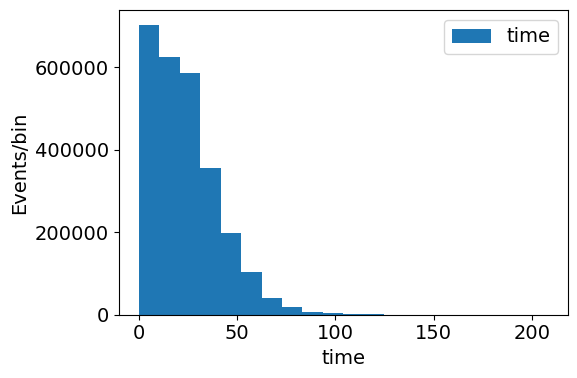

In [32]:
histoplot(df, "time", num_bins = 20, figsize=(6, 4), title="")

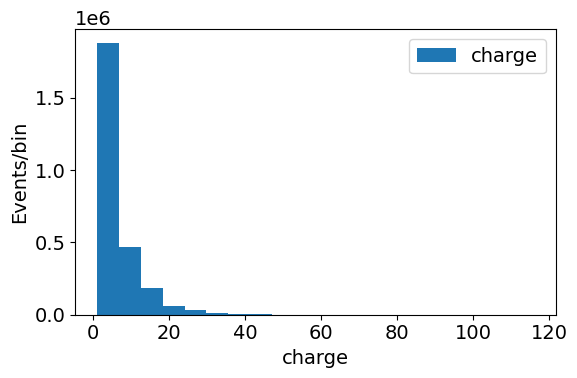

In [33]:
histoplot(df, "charge", num_bins = 20, figsize=(6, 4), title="")

## Integrated sensor data
- Sensors and chage

In [36]:
df = pd.read_csv("integrated_sensor_data.csv", header=0)
df

,event,sensor_id,amplitude
0,186,23,139
1,186,48,248
2,186,0,210
3,186,50,283
4,186,33,419
...,...,...,...
63995,999,51,170
63996,999,3,151
63997,999,39,120
63998,999,8,138


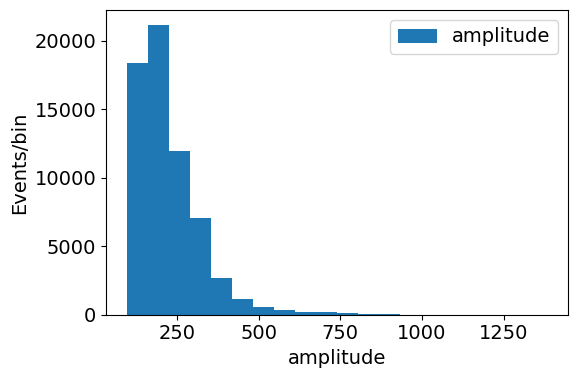

In [38]:
histoplot(df, "amplitude", num_bins = 20, figsize=(6, 4), title="")

### Plot a few events

In [39]:
# Group the DataFrame by event_number
gevt = df.groupby('event')

In [41]:
i = 0
for event_number, group in gevt:
    print(f"i = {i}, event number = {event_number}, group = {group}")
    i+=1
    if i > 2:
        break

i = 0, event number = 0, group =      event  sensor_id  amplitude
211      0          4        350
212      0         59        151
214      0         22        385
215      0         51        164
217      0         57        142
..     ...        ...        ...
399      0         24        181
405      0          1        150
408      0         16        138
412      0         53        176
414      0         25        147

[64 rows x 3 columns]
i = 1, event number = 1, group =      event  sensor_id  amplitude
704      1          7        171
705      1         59        199
706      1         49        193
707      1         48        187
708      1         28        313
..     ...        ...        ...
763      1         14        232
764      1         61        187
765      1         16        207
766      1         52        218
767      1          5        199

[64 rows x 3 columns]
i = 2, event number = 2, group =       event  sensor_id  amplitude
1216      2         42       

In [59]:
evtsel = 0
charge_matrix = select_image_from_df(evtsel)


In [60]:
charge_matrix

array([[139., 150., 189., 274., 350., 446., 446., 366.],
       [129., 198., 204., 324., 379., 509., 493., 401.],
       [138., 162., 240., 324., 329., 426., 385., 358.],
       [181., 147., 197., 230., 296., 311., 287., 239.],
       [157., 153., 175., 219., 238., 268., 224., 214.],
       [160., 170., 159., 171., 174., 190., 146., 134.],
       [165., 147., 170., 164., 151., 176., 156., 144.],
       [119., 142., 152., 151., 162., 163., 143., 143.]])

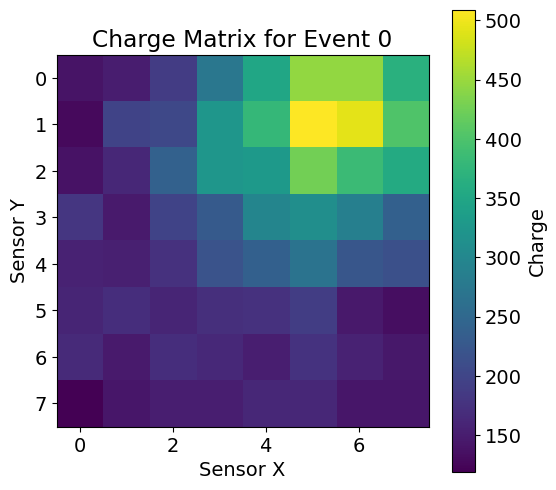

In [61]:
plot_image(charge_matrix)

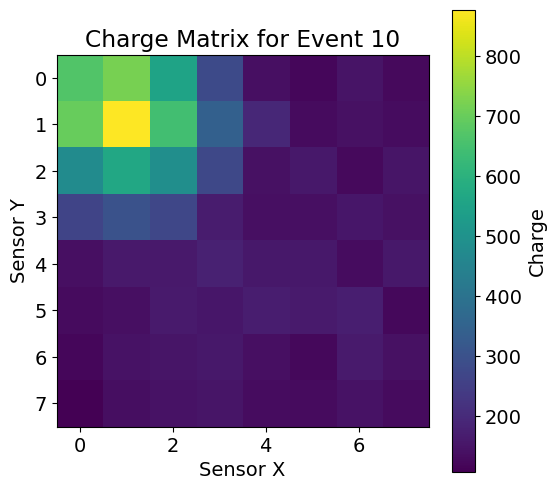

In [62]:
evtsel = 10
charge_matrix = select_image_from_df(evtsel)
plot_image(charge_matrix)

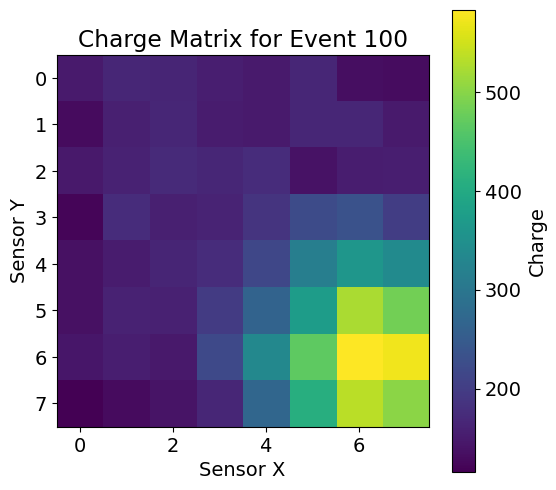

In [63]:
evtsel = 100
charge_matrix = select_image_from_df(evtsel)
plot_image(charge_matrix)